# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импорт библиотек 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import sem, t

from numpy.random import RandomState
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 

**Импортируем и рассмотрим данные**

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(geo_data_0)
print(geo_data_0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [3]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(geo_data_1)
print(geo_data_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [4]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(geo_data_2)
print(geo_data_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


**Вывод по загруженным данным**
Данных для изучения достаточно, на первый взгляд пропусков нет. Названия столбцов корректны. Рассмотрим более детально все выгрузки.

**Предобработка данных**

Проверим на наличие явных дубликатов 

In [5]:
print (geo_data_0.duplicated().sum())
print (geo_data_1.duplicated().sum())
print (geo_data_2.duplicated().sum())

0
0
0


Дубликатов нет

**Исследовательский анализ**

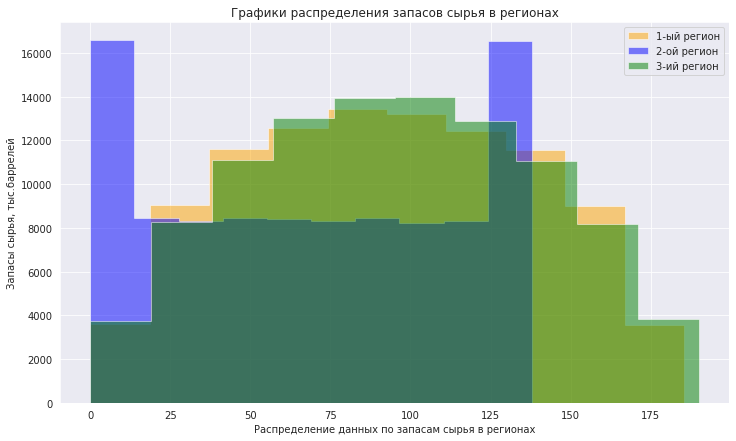

In [6]:
plt.figure(figsize=(12, 7))
sns.set_style("darkgrid")
colors = ['orange', 'blue', 'green']

ax=geo_data_0['product'].plot(kind='hist', grid=True, legend=True, alpha=0.5, histtype='stepfilled', color=colors[0], label='1-ый регион')
ax1=geo_data_1['product'].plot(kind='hist',grid=True, legend=True, alpha=0.5, histtype='stepfilled', color=colors[1], label='2-ой регион', ax=ax)
ax2=geo_data_2['product'].plot(kind='hist',grid=True, legend=True, alpha=0.5, histtype='stepfilled', color=colors[2], label='3-ий регион', ax=ax1)

plt.title('Графики распределения запасов сырья в регионах')
plt.xlabel('Распределение данных по запасам сырья в регионах')
plt.ylabel('Запасы сырья, тыс.баррелей')
plt.show()

Видим нормальное распределение, выбросы не наблюдаются. Очень схожи регион 1 и 3 по запасам сырья.

**Посмотрим как признаки коррелируют**

In [7]:
geo_data_0.corr().style.background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [8]:
geo_data_1.corr().style.background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [9]:
geo_data_2.corr().style.background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Для датасета geo_data_1 наблюдается крайне сильная прямая зависимость между метриками f2 и product, с коэффициентом корреляции Пирсона, равным 1. Для остальных датасетов, отмечается умеренная линейная зависимость с коэффициентами корреляции около 0.4 и 0.5 соответственно.

**Вывод по 1-ой части**

Для подготовки данных к дальнейшей работе были выполнены следующие шаги:
- Загружены три файла с данными;
- Выгрузки проверены на дубликаты (отсутствуют);
- Наименования столбцов корректные;
- Пропуски отсутствуют;
- Проведен исследовательский анализ;
- Признаки рассмотрены на мультиколлинеарность. Для датасета geo_data_1 наблюдается крайне сильная прямая; зависимость между метриками f2 и product;
- Выявлено, что категориальные признаки отсутствуют.

## Обучение и проверка модели

Удалим столбцы id, т.к. они не влияют на обучение модели 

In [10]:
geo_data_0 = geo_data_0.drop('id', axis = 1)
geo_data_1 = geo_data_1.drop('id', axis = 1)
geo_data_2 = geo_data_2.drop('id', axis = 1)


In [11]:
RANDOM_STATE = 42

Поделим данные на обучающую и валидационную выборки в соотношении 75:25

In [12]:
for_Xsplit_0=geo_data_0.drop(['product'], axis=1)
for_ysplit_0=geo_data_0['product']

for_Xsplit_1=geo_data_1.drop(['product'], axis=1)
for_ysplit_1=geo_data_1['product']

for_Xsplit_2=geo_data_2.drop(['product'], axis=1)
for_ysplit_2=geo_data_2['product']

display(for_Xsplit_2)
display(for_ysplit_2)

,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011
...,...,...,...
99995,-1.777037,1.125220,6.263374
99996,-1.261523,-0.894828,2.524545
99997,-1.199934,-2.957637,5.219411
99998,-2.419896,2.417221,-5.548444


0         27.758673
1         56.069697
2         62.871910
3        114.572842
4        149.600746
            ...    
99995    172.327046
99996    138.748846
99997    157.080080
99998     51.795253
99999    102.775767
Name: product, Length: 100000, dtype: float64

In [13]:
X_train_0, X_valid_0, y_train_0, y_valid_0 = train_test_split(for_Xsplit_0, for_ysplit_0, test_size=0.25, random_state=RANDOM_STATE)
shape_train_geo_0 =y_train_0.shape[0]/for_ysplit_0.shape[0]
shape_test_geo_0 =y_valid_0.shape[0]/for_ysplit_0.shape[0]

print('Размер тренировочной выборки 1 региона - {:.0%}'.format(shape_train_geo_0))
print('Размер валидационной выборки 1 региона - {:.0%}'.format(shape_test_geo_0))
print (' ')
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(for_Xsplit_1, for_ysplit_1, test_size=0.25, random_state=RANDOM_STATE)
shape_train_geo_1 =y_train_1.shape[0]/for_ysplit_1.shape[0]
shape_test_geo_1 =y_valid_1.shape[0]/for_ysplit_1.shape[0]

print('Размер тренировочной выборки 2 региона - {:.0%}'.format(shape_train_geo_1))
print('Размер валидационной выборки 2 региона - {:.0%}'.format(shape_test_geo_1))
print (' ')

X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(for_Xsplit_2, for_ysplit_2, test_size=0.25, random_state=RANDOM_STATE)
shape_train_geo_2 =y_train_2.shape[0]/for_ysplit_2.shape[0]
shape_test_geo_2 =y_valid_2.shape[0]/for_ysplit_2.shape[0]
print('Размер тренировочной выборки 3 региона - {:.0%}'.format(shape_train_geo_2))
print('Размер валидационной выборки 3 региона - {:.0%}'.format(shape_test_geo_2))

Размер тренировочной выборки 1 региона - 75%
Размер валидационной выборки 1 региона - 25%
 
Размер тренировочной выборки 2 региона - 75%
Размер валидационной выборки 2 региона - 25%
 
Размер тренировочной выборки 3 региона - 75%
Размер валидационной выборки 3 региона - 25%


 **Обучим модель и сделаем предсказания на валидационной выборке.**

In [14]:
model_0=LinearRegression()
model_0.fit(X_train_0,y_train_0)
predict_0=model_0.predict(X_valid_0)
rmse_0 = mean_squared_error(y_valid_0, predict_0)**0.5
print ('Результаты для модели по 2-ому региону')
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_0)
print('Коэффициент детерминации: %.2f' % r2_score(y_valid_0, predict_0))

Результаты для модели по 2-ому региону
Среднеквадратичная ошибка RMSE: 37.76
Коэффициент детерминации: 0.27


In [15]:
model_1=LinearRegression()
model_1.fit(X_train_1,y_train_1)
predict_1=model_1.predict(X_valid_1)
rmse_1 = mean_squared_error(y_valid_1, predict_1)**0.5
print ('Результаты для модели по 2-ому региону')
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_1)
print('Коэффициент детерминации: %.2f' % r2_score(y_valid_1, predict_1))

Результаты для модели по 2-ому региону
Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


In [16]:
model_2=LinearRegression()
model_2.fit(X_train_2,y_train_2)
predict_2=model_2.predict(X_valid_2)
rmse_2 = mean_squared_error(y_valid_2, predict_2)**0.5
print ('Результаты для модели по 2-ому региону')
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse_2)
print('Коэффициент детерминации: %.2f' % r2_score(y_valid_2, predict_2))

Результаты для модели по 2-ому региону
Среднеквадратичная ошибка RMSE: 40.15
Коэффициент детерминации: 0.20


Выведем средний запас баррелей нефти по регионам и построим график

,1 регион,2 регион,3 регион
Средний запас предсказанного сырья,92.3988,68.712878,94.771024
RMSE модели,37.7566,0.890280,40.145872


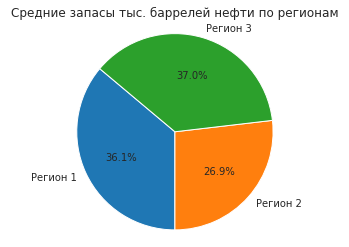

In [17]:
barrel_reg = pd.DataFrame(index=['Средний запас предсказанного сырья','RMSE модели'], columns=['1 регион','2 регион','3 регион'])
barrel_reg['1 регион'] = predict_0.mean(), rmse_0
barrel_reg['2 регион'] = predict_1.mean(), rmse_1
barrel_reg['3 регион'] = predict_2.mean(), rmse_2
display(barrel_reg)

values = [92.3988, 68.712878, 94.771024]
labels = ['Регион 1', 'Регион 2', 'Регион 3']

# Создание круговой диаграммы
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Отображение графика
plt.axis('equal')  # Для сохранения пропорций круга
plt.title('Средние запасы тыс. баррелей нефти по регионам')
plt.show()

**Выводы по 2-ой части**

**Проделаны следующие шаги**
- Данные разделены на обучающую и валидационную выборки в соотношении 75:25.
- Созданы и обучены модели линейной регрессии (LinearRegression).
- Выполнены предсказания на валидационной выборке.
- Сделаны предсказания по объему сырья в скважинах.
- Создана таблица предсказаний по объему сырья и истинных значений для каждого региона.
- Рассчитаны значения среднего запаса предсказанного сырья и RMSE моделей:

**RMSE**
- Для 'Регион 1 и 'Регион 3 значения RMSE составляют 37.75 и 40.14 соответственно. Эти высокие значения указывают на значительный разброс данных в валидационных выборках этих датасетов.
- Для 'Регион 2 значение RMSE модели составляет 0.89. Низкое значение RMSE, вероятно, связано с переобучением модели, учитывая высокую корреляцию между f2 и product (около 1.0).

**Данные по регионам**
- В 'Регионе 2 зафиксированы самые низкие запасы предсказанного сырья — всего 68.7 тысяч баррелей по сравнению с 92.4  и 94.7 тысячами баррелями для других регионов.

## Подготовка к расчёту прибыли

**Условия**
- Бюджет на разработку месторождений в этом регионе ограничен 10 миллиардами рублей. 
- При текущем рыночном курсе каждый баррель добытого сырья приносит 450 рублей прибыли, что в пересчете на объем, выраженный в тысячах баррелей, составляет 450 тысяч рублей дохода.
- С учетом потенциальных рисков рассматривается возможность исключения тех регионов, где вероятность убытка превышает 2,5%. Из оставшихся вариантов выбирается регион с наибольшей средней прибылью.

**Введем переменные согласно условию** 

In [18]:
#Бюджет на разработку скважин в регионе, тыс.руб
investment = 10000000 

#Доход с каждой единицы продукта, тыс.руб
income = 450 

#Вероятность убытков
probability_losses = 2.5/100 # вероятность убытков

#Бюджет на разработку одной скважины
investment_in_one_point = investment/200

**Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины**

In [19]:
print("Достаточный объем нефти в скважине для безубыточной работы: {0:.0f} тыс. баррелей.".format(investment_in_one_point / income ))

Достаточный объем нефти в скважине для безубыточной работы: 111 тыс. баррелей.


**Сравним полученный объём сырья со средним запасом в каждом регионе.**

Добавим ко всем фреймам дополнительный столбец, чтобы посчитать прибыль с каждой скважины

In [20]:
geo_data_0['profit']=(geo_data_0['product']*(income)).round(2)
geo_data_1['profit']=(geo_data_1['product']*(income)).round(2)
geo_data_2['profit']=(geo_data_2['product']*(income)).round(2)

Добавим столбец ROI (Return on Investment) к каждой скважине

In [21]:
geo_data_0['roi']=((geo_data_0['profit'] - investment_in_one_point)/investment_in_one_point*100).round(2)
geo_data_1['roi']=((geo_data_1['profit'] - investment_in_one_point)/investment_in_one_point*100).round(2)
geo_data_2['roi']=((geo_data_2['profit'] - investment_in_one_point)/investment_in_one_point*100).round(2)

Введем переменные со средним значением в столбце product для каждого региона

In [22]:
product_mean_0 = geo_data_0['product'].mean()
product_mean_1 = geo_data_1['product'].mean()
product_mean_2 = geo_data_2['product'].mean()

Узнаем средний ROI (Return on Investment) по каждому региону

In [23]:
print('Средний ROI по 1 региону составляет: {:.2%}'.format((product_mean_0*income/investment_in_one_point)-1))
print('Средний ROI по 2 региону составляет: {:.2%}'.format((product_mean_1*income/investment_in_one_point)-1))
print('Средний ROI по 3 региону составляет: {:.2%}'.format((product_mean_2*income/investment_in_one_point)-1))

Средний ROI по 1 региону составляет: -16.75%
Средний ROI по 2 региону составляет: -38.06%
Средний ROI по 3 региону составляет: -14.50%


**Вывод по шагу 3**

**Получены данные по каждому региону**
- Средний ROI по 1 региону составляет: -16.75%
- Средний ROI по 2 региону составляет: -38.06%
- Средний ROI по 3 региону составляет: -14.50%

**Соответственно можем сделать вывод, что разрабатывать все скважины в каждом регионе обернется большими убытками.** 

**Далее отберем 200 наиболее перспективных скважин в каждоми из регионов**

##  Функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

**Составим функцию для подсчета тех же данных (согласно заданию)**

**Выберем в каждом регионе 200 самых перспективных скважин**

In [24]:
def profit_for_geos(predict, profit):
    predict_geo = pd.Series(predict, index=profit.index).sort_values(ascending=False)[:200].sum()
    profit_geo=(predict_geo * income - investment)/1000000
    print('Запас сырья в 200 лучших скважинах Региона составит: %.2f млн.баррелей'%(predict_geo/1000))
    print('Прибыль для полученного объёма сырья составит %.2f млрд.рублей'%profit_geo)

In [25]:
print ('Регион 1')
profit_for_geos(predict_0, y_valid_0)

Регион 1
Запас сырья в 200 лучших скважинах Региона составит: 30.88 млн.баррелей
Прибыль для полученного объёма сырья составит 3.90 млрд.рублей


In [26]:
print ('Регион 2')
profit_for_geos(predict_1, y_valid_1)

Регион 2
Запас сырья в 200 лучших скважинах Региона составит: 27.75 млн.баррелей
Прибыль для полученного объёма сырья составит 2.49 млрд.рублей


In [27]:
print ('Регион 3')
profit_for_geos(predict_2, y_valid_2)

Регион 3
Запас сырья в 200 лучших скважинах Региона составит: 29.73 млн.баррелей
Прибыль для полученного объёма сырья составит 3.38 млрд.рублей


**Вывод по шагу 4**
- Если разрабатывать 200 самых перспективные скважин по каждому из регионов, то получается все они прибыльные.
- Согласно заданию далее рассмотрим их на возможные риски 

## Посчитаем риски и прибыль для каждого региона

Подготовим заранее функцию для подсчета прибыли

In [28]:
def profit_for_geos2(predict,target):
    predicted = pd.Series(predict).sort_values(ascending=False)
    selected = target[predicted.index][:200]
    product = selected.sum()
    revenue = product * income - investment
    return revenue 

Подготовим функцию для подсчета прибыли с учетом рисков 

In [29]:
def bootstap_1000(target, predict):
    values = []
    count=0
    number = 500
    for_bootstrap = 1000
    state = np.random.RandomState(12345)
    predict_x = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(for_bootstrap)):
        target_subsample = target.sample(number, replace=True, random_state=state)
        probs_subsample = predict_x[target_subsample.index]
        values.append(profit_for_geos2(probs_subsample, target_subsample))

    for val in values:
        if val < 0:
            count += 1

    values = pd.Series(values)
    profit_mean = values.mean()
    
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)
    
    print("Средняя прибыль в регионе: {:.2f} млрд.руб".format(profit_mean/100000))
    print('С вероятностью 95% прибыль в данном регионе составит от: {:.2f} млрд.руб до: {:.2f} млрд.руб'.format((lower/100000),(higher/100000)))
    print ('Вероятность убытка в данном регионе составит {:.1%}'.format(count/1000))

In [30]:
bootstap_1000 (y_valid_0, predict_0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль в регионе: 4.36 млрд.руб
С вероятностью 95% прибыль в данном регионе составит от: -1.16 млрд.руб до: 9.67 млрд.руб
Вероятность убытка в данном регионе составит 6.1%


In [31]:
bootstap_1000 (y_valid_1, predict_1)

  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль в регионе: 4.90 млрд.руб
С вероятностью 95% прибыль в данном регионе составит от: 0.55 млрд.руб до: 9.06 млрд.руб
Вероятность убытка в данном регионе составит 1.1%


In [32]:
bootstap_1000 (y_valid_2, predict_2)

  0%|          | 0/1000 [00:00<?, ?it/s]

Средняя прибыль в регионе: 4.04 млрд.руб
С вероятностью 95% прибыль в данном регионе составит от: -1.53 млрд.руб до: 9.53 млрд.руб
Вероятность убытка в данном регионе составит 7.1%


**Вывод по шагу 5**
- Получается, что по заданному риску в 2.5% проходит только регион 2, который имеет риск убытка только 1.1%
- Оказалось, что регион с меньшими суммарными запасами баррелей нефти, является наиболее перспективным для разработки 

## Общий вывод 

**В ходе исследования были выполнены следующие шаги:**
- Загружены и проверены первоначальное данные.
- Проверили данные на наличие пропусков и дубликатов.
- Проанализировали данные, построив графики и матрицы корреляции.
- Обучили модель линейной регрессии 

**Получены данные ROI по каждому из регионов**
- Средний ROI по 1 региону составляет: -16.75%
- Средний ROI по 2 региону составляет: -38.06%
- Средний ROI по 3 региону составляет: -14.50%

**При разработки только 200 самых перспкективных скважин в регионах получили следующие выводы:**
- Получается, что по заданному риску в 2.5% проходит только регион 2, который имеет риск убытка только 1.1%
- Оказалось, что регион с меньшими суммарными запасами баррелей нефти, является наиболее перспективным для разработки 

**Наиболее перспективный регион для добычи - Регион 2, т.к. принесет c большой вероятностью принесет большую прибыль.**